## The autoencoder class

In [1]:
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
import jax
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from sklearn.metrics import mean_absolute_error as mse
from sklearn.metrics import r2_score
from pennylane.optimize import AdamOptimizer,QNSPSAOptimizer
from scipy.optimize import minimize
from IPython.display import clear_output
import warnings
from autoencoder import Autoencoder
warnings.filterwarnings("ignore")



create the object by passing the number of qubit of the encoder and the trash space as well as a device

In [2]:
n_trash_qubit=1
n_qubit_autoencoder=2
n_qubit=n_qubit_autoencoder+n_trash_qubit+1 
dvc = qml.device('default.qubit', wires=n_qubit, shots=None)

ae = Autoencoder('fd',n_qubit_autoencoder,n_trash_qubit,dvc)


To Train the model, pass the values X as input.
given $X=\{x_1,\dots x_n\}$ with $x_i \in \{0,1\}$ each $x_i$ 
correspont to the parameter $\alpha$ in the formulation for an isotropic state

$$ \rho_\alpha = \frac{1-\alpha}{d^2}Id + \alpha\ket{\Phi^+}\bra{\Phi^+} $$

You also need to set up the optimizer and decide the number of epochs. Note that batching is not set up yet

In [3]:
epochs= 10
n= 111
opt=AdamOptimizer(stepsize=.2)
X=np.random.rand(n)
np.random.shuffle(X)

history = ae.train(X,opt,epochs)


you can plot the training circuit as well as the loss function

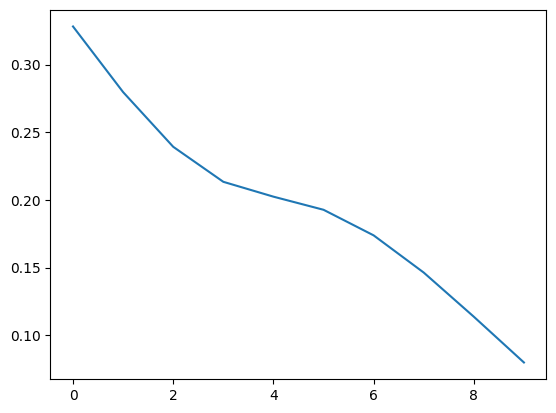

In [4]:
ae.plot_loss()


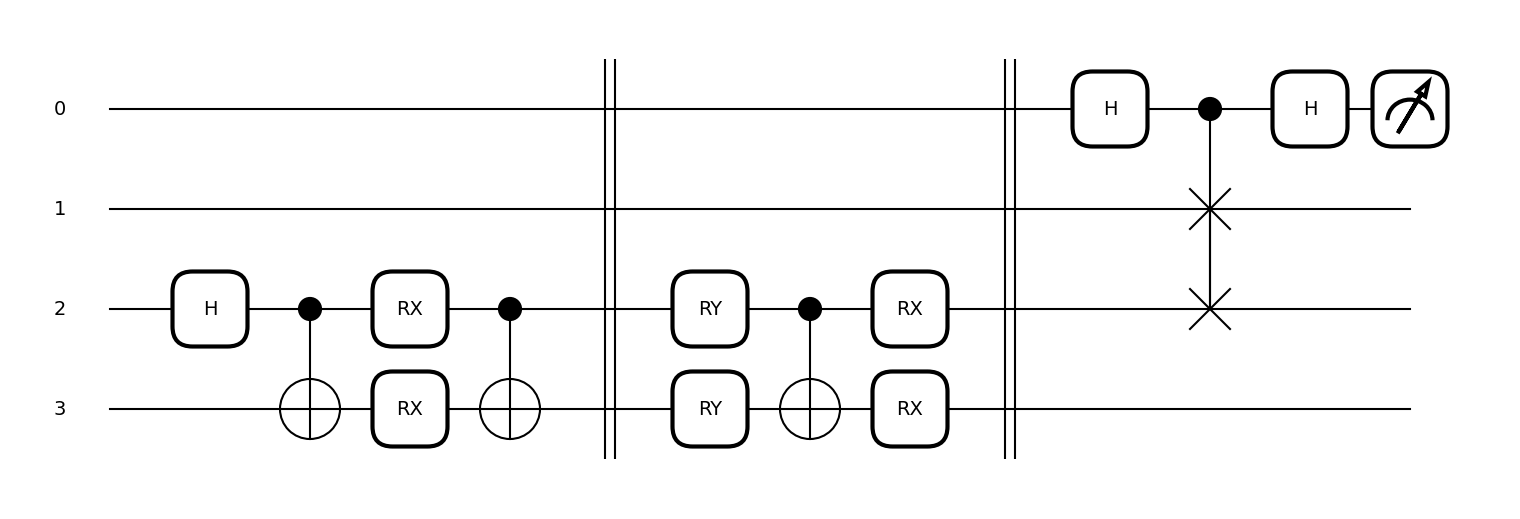

In [5]:
ae.plot_cirq()

## Add the trained autoencoder to a new circuit